### 範例一

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [2]:
Fs = 150.0;     # sampling rate取樣率
Ts = 1.0/Fs;    # sampling interval 取樣區間
t = np.arange(0,1,Ts)  # time vector,這裡Ts也是步長

ff = 25;     # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y)     # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T     # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range
 
YY = np.fft.fft(y)   # 未歸一化
Y = np.fft.fft(y)/n   # fft computing and normalization 歸一化
Y1 = Y[range(int(n/2))]

In [3]:
maxArray =[];
tempMax = max(Y1);
for i in frq1:
    if Y1[int(i)]==tempMax:
        maxArray.append(int(i))
    

In [41]:
maxArray

[25]

In [42]:
abs(tempMax)

1.0

In [37]:
tempMax

(2.747431911605721e-15-0.5j)

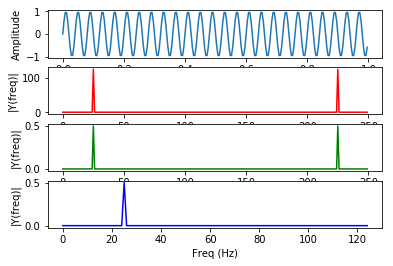

In [4]:
fig, ax = plt.subplots(4, 1)
 
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].plot(frq,abs(YY),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

ax[2].plot(frq,abs(Y),'G') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')

ax[3].plot(frq1,abs(Y1),'B') # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y(freq)|')
 
plt.show()

### 範例二

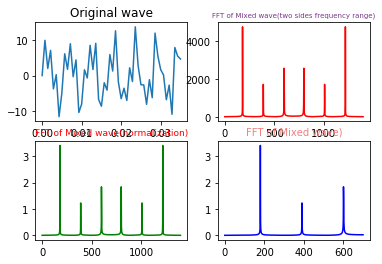

In [47]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn
 
 
#取樣點選擇1400個，因為設定的訊號頻率分量最高為600赫茲，根據取樣定理知取樣頻率要大於訊號頻率2倍，所以這裡設定取樣頻率為1400赫茲（即一秒內有1400個取樣點，一樣意思的）
x=np.linspace(0,1,1400) 
 
#設定需要取樣的訊號，頻率分量有180，390和600
y=7*np.sin(2*np.pi*180*x) + 2.8*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)
 
yy=fft(y)      #快速傅立葉變換
yreal = yy.real    # 獲取實數部分
yimag = yy.imag    # 獲取虛數部分
 
yf=abs(fft(y))    # 取絕對值
yf1=abs(fft(y))/len(x)   #歸一化處理
yf2 = yf1[range(int(len(x)/2))] #由於對稱性，只取一半區間
 
xf = np.arange(len(y))  # 頻率
xf1 = xf
xf2 = xf[range(int(len(x)/2))] #取一半區間
 
 
plt.subplot(221)
plt.plot(x[0:50],y[0:50])
plt.title('Original wave')
 
plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B') #注意這裡的顏色可以查詢顏色程式碼表
 
plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')
 
plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')
 
 
plt.show()